# What will YOU see in Airbnb listings when planning for your next trip to Boston?

I have been hearing about Airbnb for a little while but never had a need to use it myself. Since I am living in Massachusette, I know that a hotel price in the Boston area in general is quite expensive and it is very interesting to see how Airbnb works in the Boston area so I might be able to recommends them to friends when they come to Boston in the future :)

In particular, there are a few questions regarding to Airbnb listings in Bostong that I would like to explore further:

1. Which areas have the most number of Airbnb listings and what is a median listing price of each area?
2. Which areas are the most cost effective?
3. When should I start booking?

To explore those questions, I will use the data extracted from insideairbnb.com
http://insideairbnb.com/get-the-data.html
for Boston, Massachusetts, United States and use the data set that was compiled on 17 November 2018.

*************************************

To get started, let's read in the necessary libraries and take a quick look at data that we will use in this analysis:

In [369]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

%matplotlib inline

We will be using two data sets in this analysis: 
1. listing.csv 
   - This data set contains details of each airbnb listing in the Boston area 
2. calendar.csv
   - This data set contains information about pricing and availability of each listing for the next calendar year (November 2018 to November 2019)
   - An Airbnb host can setup a calendar for their listing so that it is only available for a few days or weeks a year.
   - Other listings are available all year round (except for when it is already booked).
3. neighbourhoods.csv
   - This data set contains a list of neighborhoods in the boston data set

### Data Wrangling

#### Collecting data of listing details

Let's read 'listing.csv' and inspect the data

In [122]:
df_listing_orig = pd.read_csv('./listings.csv')
df_listing_orig.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,3781,https://www.airbnb.com/rooms/3781,20181117191239,2018-11-17,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,f,NaN,NaN,f,f,super_strict_30,f,f,1,0.34
1,5506,https://www.airbnb.com/rooms/5506,20181117191239,2018-11-17,**$99 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.68
2,6695,https://www.airbnb.com/rooms/6695,20181117191239,2018-11-17,$125 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,6,0.73
3,6976,https://www.airbnb.com/rooms/6976,20181117191239,2018-11-17,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,f,moderate,t,f,1,0.66
4,8789,https://www.airbnb.com/rooms/8789,20181117191239,2018-11-17,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,13,0.40


In [123]:
# Inspect available columns in data
df_listing_orig.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [124]:
# Inspect a number of rows and type of each column
df_listing_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6296 entries, 0 to 6295
Data columns (total 96 columns):
id                                  6296 non-null int64
listing_url                         6296 non-null object
scrape_id                           6296 non-null int64
last_scraped                        6296 non-null object
name                                6294 non-null object
summary                             6105 non-null object
space                               4688 non-null object
description                         6252 non-null object
experiences_offered                 6296 non-null object
neighborhood_overview               4132 non-null object
notes                               3599 non-null object
transit                             4354 non-null object
access                              3718 non-null object
interaction                         3976 non-null object
house_rules                         4134 non-null object
thumbnail_url                       0 no

There are many columns that contain a lot of missing values and we don't need many of them for this analysis. Hence, extract only interested columns that will be used in our analysis:

In [126]:
interested_columns = ['id', 'name', 'summary',
       'space', 'description', 
       'host_id', 'host_name', 'host_since', 
       'host_total_listings_count', 'neighbourhood_cleansed', 'zipcode', 
       'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'cancellation_policy',
       'calculated_host_listings_count', 'reviews_per_month']

df_listing = df_listing_orig[interested_columns]

Since price is stored as string in the format '$xxx.xx', we need to update this data to a numeric type

In [129]:
# Invoke copy() method to prevent a warning from pandas
df_listing = df_listing.copy()

# To update the price column, we need to remove the prefix '$' and convert strint to float
df_listing.loc[:, ['price']] = df_listing['price'].replace('[\$,]', '', regex=True).astype(float)


#### Collecting listing data of the next calendar year

Let's read 'calendar.csv' and inspect the data

In [130]:
df_calendar_orig = pd.read_csv('./calendar.csv')
df_calendar_orig.sample(10)

,listing_id,date,available,price
1636994,23465746,2019-03-31,f,NaN
1003862,18580155,2019-11-05,t,$238.00
2149019,29388470,2019-04-14,f,NaN
1994036,27953346,2019-10-21,f,NaN
1461407,22087346,2019-08-05,f,NaN
1832708,26270400,2019-09-03,f,NaN
134561,3068453,2019-09-21,f,NaN
793110,15344876,2019-09-07,t,$68.00
1318855,21353955,2019-07-28,f,NaN
1242289,21079638,2018-11-17,f,NaN


Clean data to an appropriate format

In [131]:
# Crete a copy of the original data
df_calendar = df_calendar_orig.copy()

# Change a type of the 'date' column to datetime
df_calendar['date'] = df_calendar_orig['date'].astype('datetime64[ns]')

# Change a type of the 'price' column to float by 
# 1. Removing the prepended $
# 2. Convert a string of number to float
df_calendar['price'] = df_calendar_orig['price'].replace('[\$,]', '', regex=True).astype(float)

In [133]:
# Inspect data type of the updated data
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298040 entries, 0 to 2298039
Data columns (total 4 columns):
listing_id    int64
date          datetime64[ns]
available     object
price         float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 70.1+ MB


In [134]:
# Inspect sampled data
df_calendar_orig.sample(5)

,listing_id,date,available,price
1715967,24605093,2019-07-27,f,NaN
1029932,18325968,2019-03-13,t,$114.00
2092201,29073222,2019-05-09,f,NaN
476310,9212213,2018-12-02,t,$100.00
1080654,19140676,2019-08-08,t,$54.00


#### Collecting a list of neighbourhoods

Get a list of neighbourhoods for the boston dataset from neighbourhoods.csv

In [135]:
df_neighbourhoods = pd.read_csv('./neighbourhoods.csv')

df_neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Allston
1,NaN,Back Bay
2,NaN,Bay Village
3,NaN,Beacon Hill
4,NaN,Brighton


In [136]:
# Drop the 'neighbourhood_group' column since it does not contain any information
df_neighbourhoods = df_neighbourhoods.drop(['neighbourhood_group'], axis=1)

# Get a list of all neighbourhoods
neighbourhoods = df_neighbourhoods['neighbourhood'].tolist()

In [137]:
neighbourhoods

['Allston',
 'Back Bay',
 'Bay Village',
 'Beacon Hill',
 'Brighton',
 'Charlestown',
 'Chinatown',
 'Dorchester',
 'Downtown',
 'East Boston',
 'Fenway',
 'Harbor Islands',
 'Hyde Park',
 'Jamaica Plain',
 'Leather District',
 'Longwood Medical Area',
 'Mattapan',
 'Mission Hill',
 'North End',
 'Roslindale',
 'Roxbury',
 'South Boston',
 'South Boston Waterfront',
 'South End',
 'West End',
 'West Roxbury']

## Question 1 

### Which areas have the most number of Airbnb listings and what is a median listing price of each area?


First, we need to find a number of Airbnb listings in each neighborhood in Boston first

In [140]:
# Group df_listing by the 'neighbourhood_cleansed' column and get a count in each group
# Then, reset the index and name a value column that contains a number of listings 
# in each group to 'counts'.
# Finally, sort the newly created data frame descendingly by the 'counts' column.
df_neighbourhood_count = df_listing.groupby(['neighbourhood_cleansed']) \
                            .size() \
                            .reset_index(name='counts') \
                            .sort_values(by=['counts'], ascending=False)

Now, take a look at how a distribution of a number of listing in Boston looks like

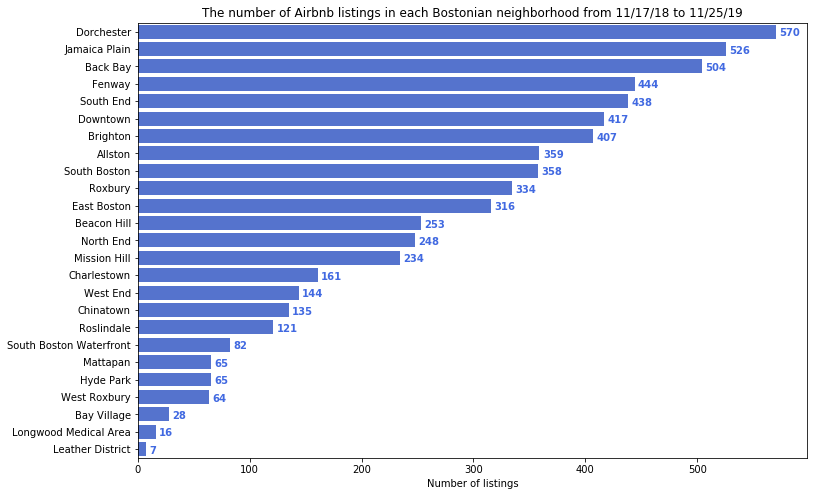

In [145]:
# Make a plot bigger so it is easier to read 
fig = plt.gcf()
fig.set_size_inches(12, 8)

# Create a horizontal bar plot by using values of the 'counts' column in the x-axis 
# and neighbourhood names in the 'neighbourhood_cleansed' column in the y-axis
ax = sns.barplot(x="counts", y="neighbourhood_cleansed", 
                 data=df_neighbourhood_count, 
                 color="royalblue")
ax.set(xlabel='Number of listings', ylabel='');
ax.set_title('The number of Airbnb listings in each Bostonian neighborhood from 11/17/18 to 11/25/19');

# Also add a value next to the corresponding bar to improve the readability
for i, v in enumerate(df_neighbourhood_count["counts"]):
    ax.text(v + 3, i + .25, str(v), color='royalblue', fontweight='bold')

The boxplot below shows that a distribution of listing price or each neighborhood is mostly right skewed. Is this due to a room type of the listing? 
We will explore this further later in this section.

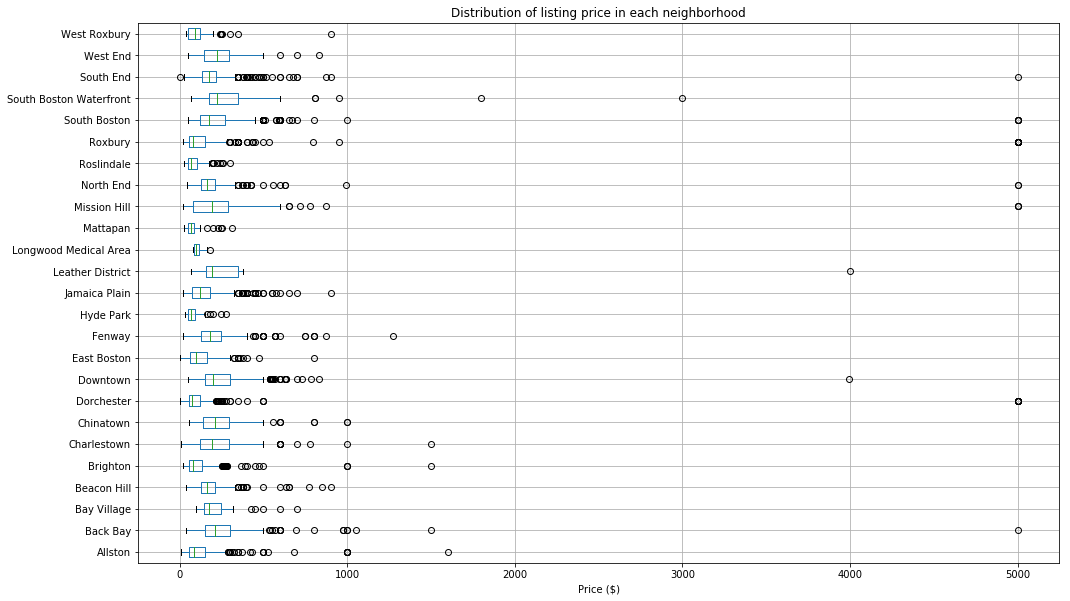

In [187]:
# Create a boxplot to inspect a distribution of price in each neighborhood
ax = df_listing.boxplot(column=['price'], by=['neighbourhood_cleansed'], figsize=(16,10), vert=False);
ax.set(xlabel='Price ($)', ylabel='');
plt.title("Distribution of listing price in each neighborhood")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

Now, Let's compare a number of listings and a median price in each neighborhood

In [195]:
# Create a dataframe to store a median price in each neighbourhood and sort descendingly by
# the median price
df_neighbourhood_median_price = df_listing.groupby(['neighbourhood_cleansed'])['price'] \
                                    .median() \
                                    .round(2) \
                                    .reset_index(name='median_price') \
                                    .sort_values(by=['median_price'], ascending=False)

In [196]:
# Merge dataframes for the count and median price to compare
df_neighbourhood_combined = pd.merge(df_neighbourhood_count, df_neighbourhood_median_price, 
                                     on='neighbourhood_cleansed')
df_neighbourhood_combined


,neighbourhood_cleansed,counts,median_price
0,Dorchester,570,75.0
1,Jamaica Plain,526,120.0
2,Back Bay,504,213.0
3,Fenway,444,178.0
4,South End,438,175.0
5,Downtown,417,200.0
6,Brighton,407,80.0
7,Allston,359,83.0
8,South Boston,358,172.0
9,Roxbury,334,80.0


Now, let's visualize a comparison between a number of listings and median price in each area

First, take a look bar charts of a number of listings and median price in each area, respectively, and plot them side by side.

The plots below clearly show that Dorchester has a much lower median price when it has the most number of listings. This is kind of make sense because Dorchester is much further away from the downtown area.

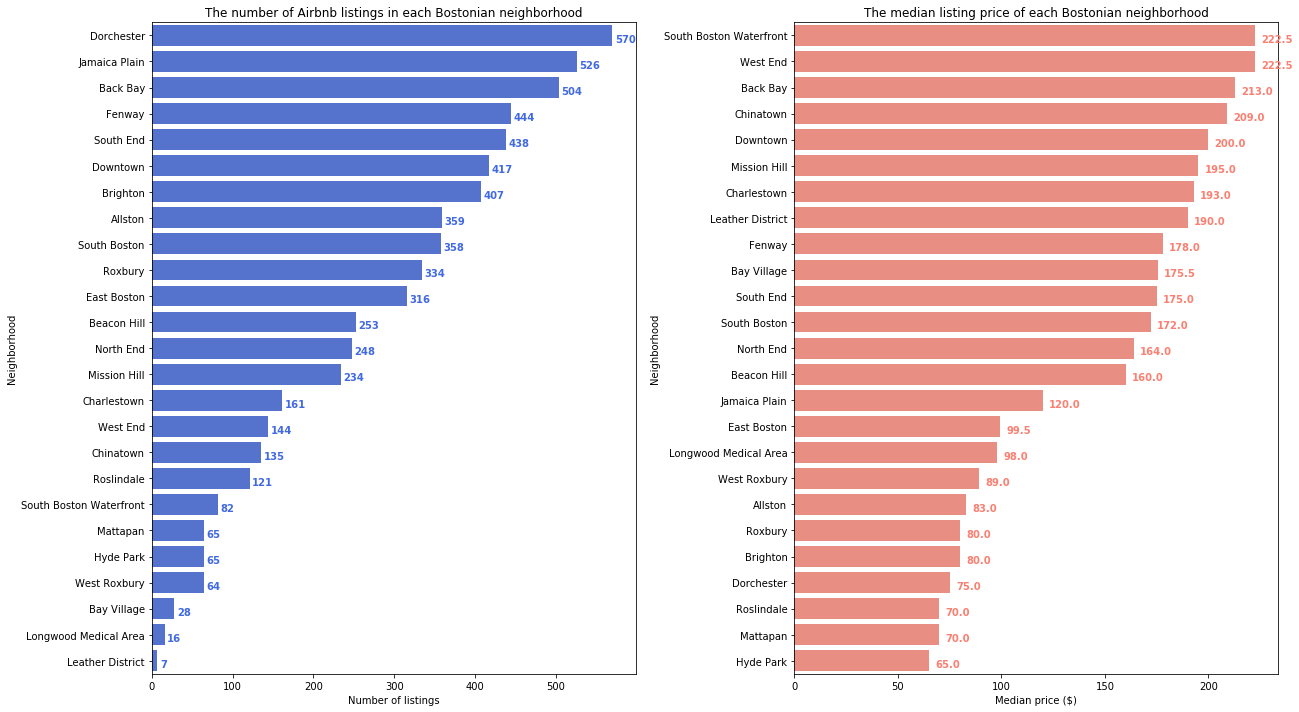

In [201]:
## Create two plots side-by-side where
# plot 1: Show a distribution of a number of listing across all neighborhoods
# plot 2: Show a distribution of a median listing price across all neighborhoods

fig = plt.figure(figsize=(18,10))

# plot 1: Show a distribution of a number of listing across all neighborhoods
ax1 = fig.add_subplot(121)
sns.barplot(x="counts", y="neighbourhood_cleansed", 
                 data=df_neighbourhood_count, 
                 color="royalblue", ax=ax1)
ax1.set(xlabel='Number of listings', ylabel='Neighborhood');
ax1.set_title('The number of Airbnb listings in each Bostonian neighborhood');
plt.tight_layout()


for i, v in enumerate(df_neighbourhood_count["counts"]):
    ax1.text(v + 3, i + .25, str(v), color='royalblue', fontweight='bold')

# plot 2: Show a distribution of a median listing price across all neighborhoods
ax2 = fig.add_subplot(122)
sns.barplot(x="median_price", y="neighbourhood_cleansed", 
                 data=df_neighbourhood_median_price, 
                 color="salmon", ax=ax2)
ax2.set(xlabel='Median price ($)', ylabel='Neighborhood');
ax2.set_title('The median listing price of each Bostonian neighborhood');
plt.tight_layout()

for i, v in enumerate(df_neighbourhood_median_price["median_price"]):
    ax2.text(v + 3, i + .25, str(v), color='salmon', fontweight='bold')

Let's take a look at a scatter plot of a number of listing counts in each neighborhood where a bubble size indicates a scale of median listing price when comparing to other neighborhood.

This chart shows a number of listing does not have a significant impact on the price since there are those neighborhood in the city area like Back Bay and Fenway have a lot of listings and the median price is in the higher end.

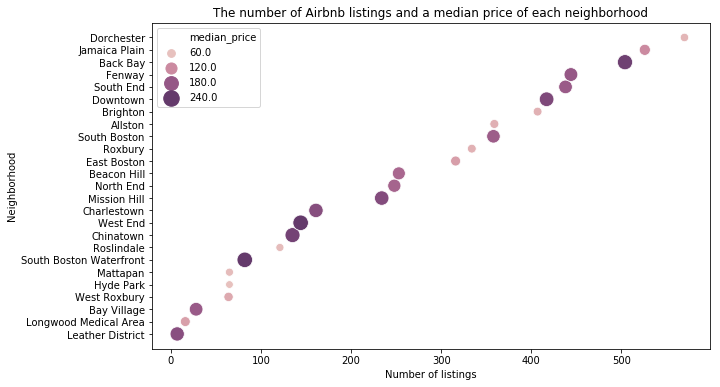

In [203]:
fig = plt.figure(figsize=(10,6))

# Change the color paleete for the seaborn plot
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

# Create a scatter plot for a number of count and use a bubble size and hue to represent
# a median listing price
ax = sns.scatterplot(y="neighbourhood_cleansed", x="counts",
                     hue="median_price", size="median_price",
                     sizes=(60, 240),
                     palette=cmap,
                     data=df_neighbourhood_combined.sort_values(by=['counts']))

ax.set(xlabel='Number of listings', ylabel='Neighborhood');
ax.set_title('The number of Airbnb listings and a median price of each neighborhood');

### Summary

We saw that the suburb areas like Dorchester and Jamaica Plain have the most number of Airbnb listings in the Boston area where the median price in those two neighborhoods are relatively lower that other neighborhoods.

## Question 2

### Which neighborhoods are the most cost effective?

In the previous question, we looked at the data based on a number of listings and median listing price but did not take into account a room type of those listings.

In order to find a neighborhood that is the most cost effective, we will include a room type in our analysis as well.

First, let's get a number of listings of each room type for each neighborhood.

In [205]:
# First, group data based on a neighborhood and a room type
df_g_num_roomtype = df_listing.groupby(['neighbourhood_cleansed', 'room_type']).size()

df_g_num_roomtype

neighbourhood_cleansed   room_type      
Allston                  Entire home/apt    152
                         Private room       201
                         Shared room          6
Back Bay                 Entire home/apt    446
                         Private room        55
                         Shared room          3
Bay Village              Entire home/apt     22
                         Private room         6
Beacon Hill              Entire home/apt    218
                         Private room        34
                         Shared room          1
Brighton                 Entire home/apt    166
                         Private room       235
                         Shared room          6
Charlestown              Entire home/apt    117
                         Private room        43
                         Shared room          1
Chinatown                Entire home/apt    120
                         Private room        13
                         Shared room          2

In [214]:
# Reformat the dataframe and fill na with 0
df_num_roomtype = df_g_num_roomtype.unstack()
df_num_roomtype = df_num_roomtype.fillna(0)

# Create a new column to store a total number of listings of each neighborhood
df_num_roomtype['total_listings'] = df_num_roomtype['Entire home/apt'] \
                                    + df_num_roomtype['Private room'] \
                                    + df_num_roomtype['Shared room']

# Then, sort the dataframe based on a total number of listings
df_num_roomtype = df_num_roomtype.sort_values(['total_listings'], ascending=False)

# Cast all columns to int
df_num_roomtype = df_num_roomtype.astype(int)

In [215]:
df_num_roomtype

room_type,Entire home/apt,Private room,Shared room,total_listings
neighbourhood_cleansed,,,,
Dorchester,149,415,6,570
Jamaica Plain,284,222,20,526
Back Bay,446,55,3,504
Fenway,360,79,5,444
South End,358,76,4,438
Downtown,371,43,3,417
Brighton,166,235,6,407
Allston,152,201,6,359
South Boston,252,104,2,358


In [225]:
# Get a ratio of each room type in each neighborhood
df_num_roomtype_percentage = ((df_num_roomtype.div(df_num_roomtype['total_listings'], axis='index')) * 100).round(2)

df_num_roomtype_percentage

room_type,Entire home/apt,Private room,Shared room,total_listings
neighbourhood_cleansed,,,,
Dorchester,26.14,72.81,1.05,100.0
Jamaica Plain,53.99,42.21,3.80,100.0
Back Bay,88.49,10.91,0.60,100.0
Fenway,81.08,17.79,1.13,100.0
South End,81.74,17.35,0.91,100.0
Downtown,88.97,10.31,0.72,100.0
Brighton,40.79,57.74,1.47,100.0
Allston,42.34,55.99,1.67,100.0
South Boston,70.39,29.05,0.56,100.0


Let's plot a stacked bar chart to get a better sense of a number of each room type in each neighborhood

In [238]:
def plot_num_listings_by_room_type(df_num_roomtype, ax=None):
    '''
    Create a bar char to show a number of listings based on room type
    '''
    
    # If ax is not specified, use a default one
    if (not ax):
        ax = plt.gca()
        
    df_num_roomtype[['Entire home/apt', 'Private room', 'Shared room']].plot(
        kind='barh', stacked=True, ax=ax);
    ax.invert_yaxis()

    for i, v in enumerate(df_num_roomtype["total_listings"]):
        ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

    ax.set(xlabel='Number of listings', ylabel='');
    ax.set_title('The number of listings of each room type in each Bostonian neighborhood');
    
    return ax

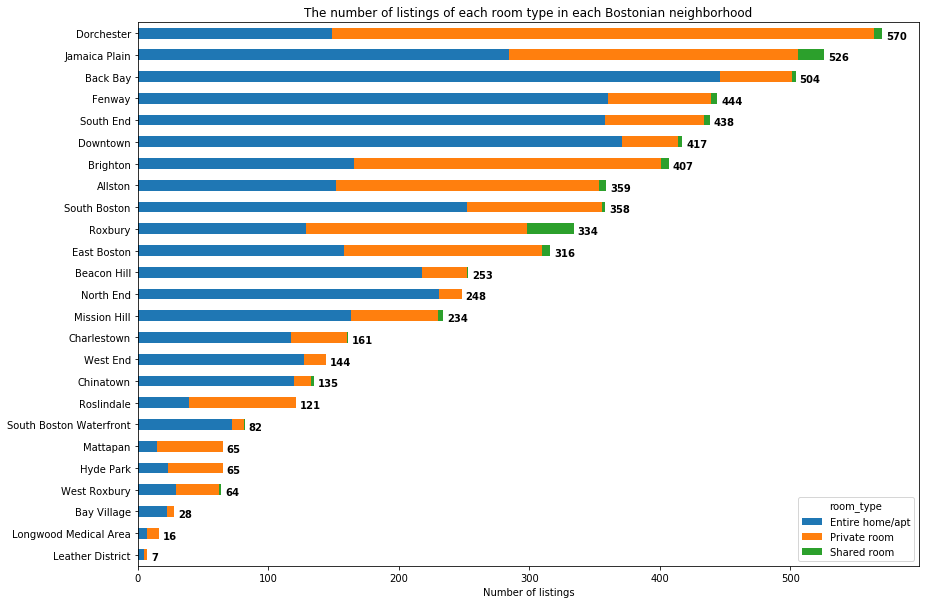

In [252]:
fig = plt.figure(figsize=(14,10))

plot_num_listings_by_room_type(df_num_roomtype);

The chart and table data above show that a majority of room types of listings in the suburb areas such as Dorchester, Brighton, Brighton, Mattapan, and Hyde Park are a private room. 

In contrast, a majority of room types of listings in the city areas such as Back Bay, Fenway, South End, Downtown, and South Boston are an entire home/apartment. 

Next, let's find a median price of each room type of each neighborhood and compare it with a number of listings

In [248]:
# Group dataframe by neighborhood and room type and find a median listing price
df_g_price_roomtype = df_listing.groupby(['neighbourhood_cleansed', 'room_type'])['price'].median()
df_price_roomtype = df_g_price_roomtype.unstack()

# Update order to match the plot
df_price_roomtype = df_price_roomtype.reindex(index = df_num_roomtype.index)


In [249]:
def plot_table(df, ax=None):
    '''
    Create a table of the specified dataframe in given axes
    '''
    
    # If ax is not specified, use a default one
    if (not ax):
        ax = plt.gca()

    font_size=10
    bbox=[0.2, 0, 0.8, 1]
    ax.axis('off')
    mpl_table = ax.table(cellText = df.values, rowLabels = df.index, bbox=bbox, colLabels=df.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)


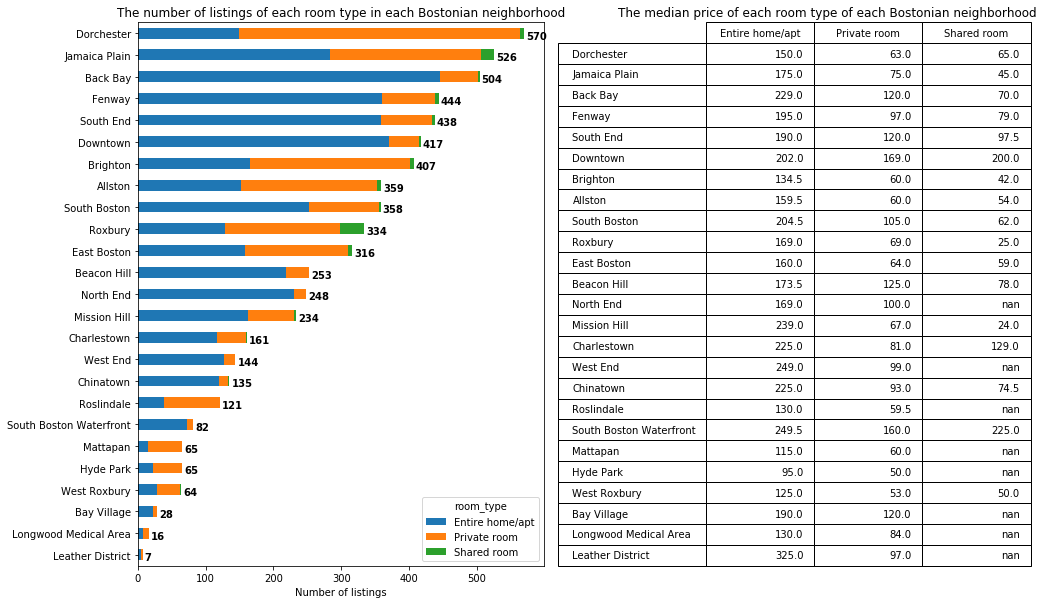

In [251]:
## Comparing a number of listings and a median price by plotting them next side-by-side

fig = plt.figure(figsize=(16,10))

# Plot 1: A number of listings of each room type by neighborhood
ax1 = fig.add_subplot(121)
plot_num_listings_by_room_type(df_num_roomtype, ax = ax1)
    
# Plot 2: A median price of each room type by neighborhood
ax2 = fig.add_subplot(122)
plot_table(df_price_roomtype, ax = ax2)

ax2.set_title('The median price of each room type of each Bostonian neighborhood');


Let's find descriptive statistics of a median price for each room type in each neighborhood

In [261]:
df_price_roomtype.describe()

room_type,Entire home/apt,Private room,Shared room
count,25.000000,25.000000,17.000000
mean,184.340000,90.020000,81.117647
std,52.106206,32.207168,55.701360
min,95.000000,50.000000,24.000000
25%,150.000000,63.000000,50.000000
50%,175.000000,84.000000,65.000000
75%,225.000000,105.000000,79.000000
max,325.000000,169.000000,225.000000


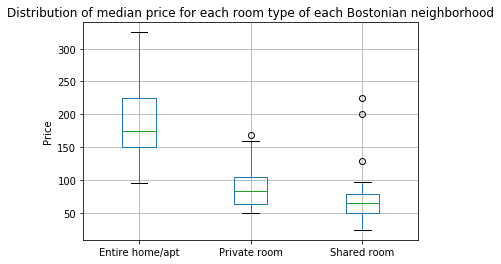

In [281]:
# Inspect a boxplot
ax = df_price_roomtype.boxplot();
ax.set(xlabel='', ylabel='Price');
ax.set_title('Distribution of median price for each room type in each Bostonian neighborhood');

Dorchester is a little further away from the city but has a lot of listings and the median price is still in the interquantile range. 
May be there are other factors that contribute to this?

Let's take a look at a number of accommodates and listings of each room type to see whether they are correlate to the price or not

In [272]:
# Get a dataframe of an average number of accomodates of each room type in each neighborhood
df_neighbourhood_accomodates = df_listing.groupby(['neighbourhood_cleansed', 'room_type']) \
                                ['accommodates'] \
                                .mean() \
                                .round(2).unstack()

# Sort rows based on a total number of listings (descending)
df_neighbourhood_accomodates = df_neighbourhood_accomodates.reindex(index = df_num_roomtype.index)

In [273]:
# Get a dataframe of an average number of bedrooms of each room type in each neighborhood
df_neighbourhood_bedrooms = df_listing.groupby(['neighbourhood_cleansed', 'room_type']) \
                                ['bedrooms'] \
                                .mean() \
                                .round(2) \
                                .unstack()

# Sort rows based on a total number of listings (descending)
df_neighbourhood_bedrooms = df_neighbourhood_bedrooms.reindex(index = df_num_roomtype.index)

Now, let's compare the average number of accomodates and bedrooms in each neighborhood and also take a look at a number of listings side-by-side

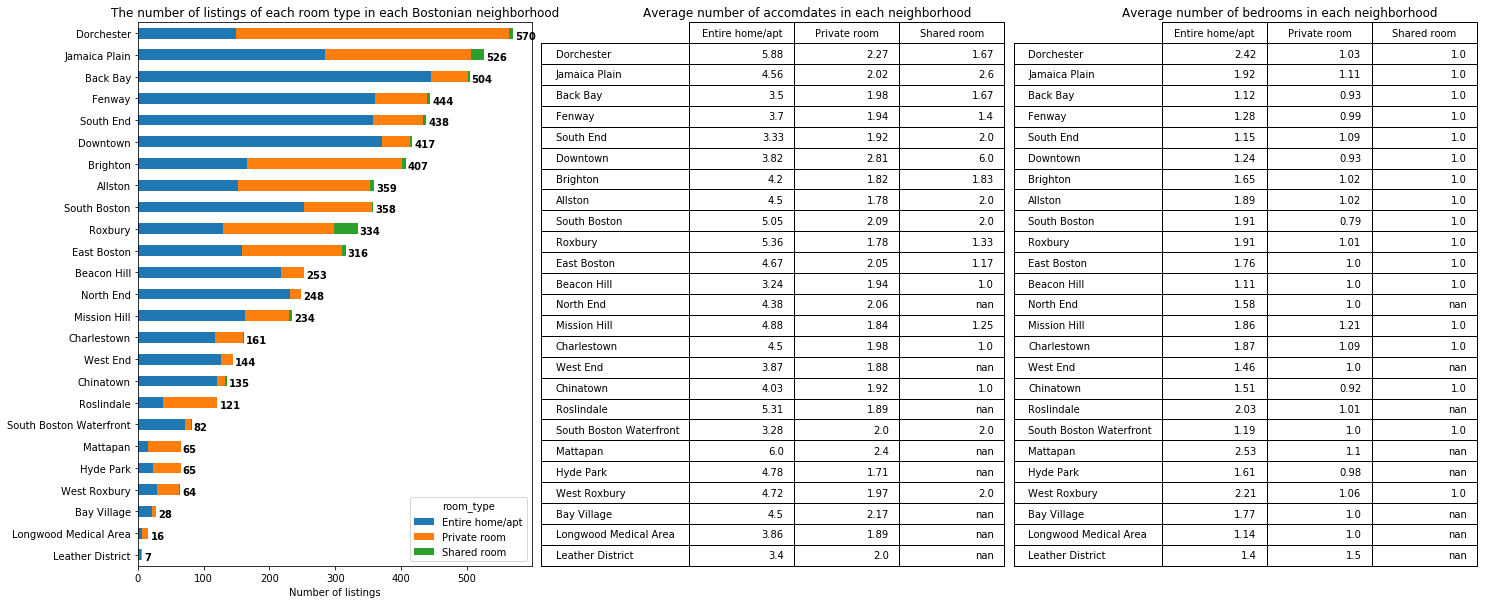

In [277]:
fig = plt.figure(figsize=(24,10))

# Plot1: Distribution of a number of listings
ax1 = fig.add_subplot(131)
plot_num_listings_by_room_type(df_num_roomtype, ax = ax1)

# ----
# Plot2: Table of an average number of accomodates in each neighborhood
ax2 = fig.add_subplot(132)
plot_table(df_neighbourhood_accomodates, ax = ax2)

ax2.set_title('Average number of accomdates in each neighborhood');

# ----
# Plot3: Table of an average number of bedrooms in each neighborhood
ax3 = fig.add_subplot(133)
plot_table(df_neighbourhood_bedrooms, ax = ax3)

ax3.set_title('Average number of bedrooms in each neighborhood');

Let's take a look at descriptive statistics of an average number of ACCOMMODATES in each neighborhood

In [282]:
df_neighbourhood_accomodates.describe()

room_type,Entire home/apt,Private room,Shared room
count,25.000000,25.000000,17.000000
mean,4.372800,2.004400,1.877647
std,0.781049,0.226497,1.156841
min,3.240000,1.710000,1.000000
25%,3.820000,1.890000,1.250000
50%,4.500000,1.970000,1.670000
75%,4.780000,2.050000,2.000000
max,6.000000,2.810000,6.000000


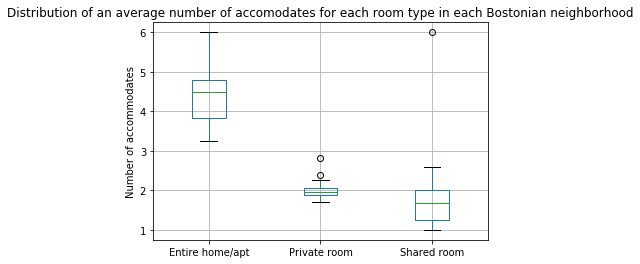

In [285]:
ax = df_neighbourhood_accomodates.boxplot();
ax.set(xlabel='', ylabel='Number of accommodates');
ax.set_title('Distribution of an average number of accomodates for each room type in each Bostonian neighborhood');

Let's also take a look at descriptive statistics of an average number of BEDROOMS in each neighborhood:

In [286]:
df_neighbourhood_bedrooms.describe()

room_type,Entire home/apt,Private room,Shared room
count,25.000000,25.000000,17.0
mean,1.660800,1.031600,1.0
std,0.404711,0.124789,0.0
min,1.110000,0.790000,1.0
25%,1.280000,1.000000,1.0
50%,1.650000,1.000000,1.0
75%,1.910000,1.060000,1.0
max,2.530000,1.500000,1.0


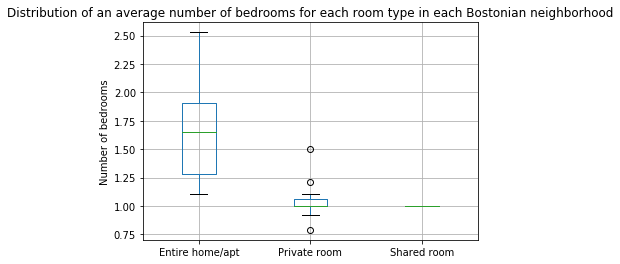

In [287]:
ax = df_neighbourhood_bedrooms.boxplot();
ax.set(xlabel='', ylabel='Number of bedrooms');
ax.set_title('Distribution of an average number of bedrooms for each room type in each Bostonian neighborhood');

Now, let's find out how much in average each person needs to pay for each type of room in each neighborhood

In [360]:
# Find descriptive statistics of a median listing price divide by 
# an average number of accommodates

df_price_per_accommodates = df_price_roomtype.div(df_neighbourhood_accomodates, axis='index')
df_price_per_accommodates.describe()

room_type,Entire home/apt,Private room,Shared room
count,25.000000,25.000000,17.000000
mean,44.582157,44.691712,48.531358
std,18.313702,14.058026,32.826687
min,19.166667,25.000000,17.307692
25%,32.023810,32.967033,25.000000
50%,40.495050,44.444444,38.922156
75%,53.549383,52.659574,56.428571
max,95.588235,80.000000,129.000000


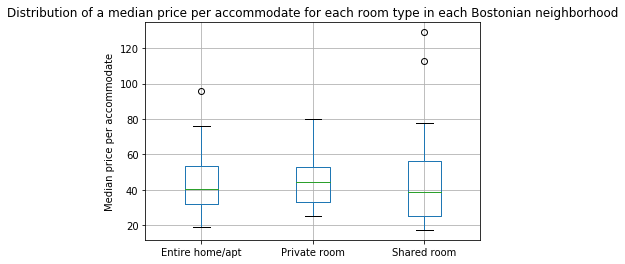

In [365]:
# Next, inspect the boxplot
ax = df_price_per_accommodates.boxplot();
ax.set(xlabel='', ylabel='Median price per accommodate');
ax.set_title('Distribution of a median price per accommodate for each room type in each Bostonian neighborhood');


In [325]:
def plot_barh_with_value(df, ax=None):
    '''
    Create a horizontal bar chart for the given dataframe
    '''
    
    # If ax is not specified, use a default one
    if (not ax):
        ax = plt.gca()
        
    df.plot(kind='barh', ax=ax);
    ax.invert_yaxis();
    plt.tight_layout();

    for i, v in enumerate(df.values):
        if not math.isnan(v):
            v = v.round(2)
            ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

    return ax

In [356]:
def plot_medianprice_per_counts(df, title=''):

    fig = plt.figure(figsize=(16,10));

    # Plot1: 
    ax1 = fig.add_subplot(131);
    plot_barh_with_value(df['Entire home/apt'], ax=ax1);
    ax1.set(xlabel='', ylabel='');
    ax1.set_title('Entire home/apt');

    # Plot2:
    ax2 = fig.add_subplot(132);
    plot_barh_with_value(df['Private room'], ax=ax2);
    ax2.set(xlabel='', ylabel='');
    ax2.set_title('Private room');

    # Plot3:
    ax3 = fig.add_subplot(133);
    plot_barh_with_value(df['Shared room'], ax=ax3);
    ax3.set(xlabel='', ylabel='');
    ax3.set_title('Shared room');

    # -----
    fig.suptitle(title, fontsize=18)
    # shift subplots down:
    st.set_y(0.9)
    fig.subplots_adjust(top=0.9)

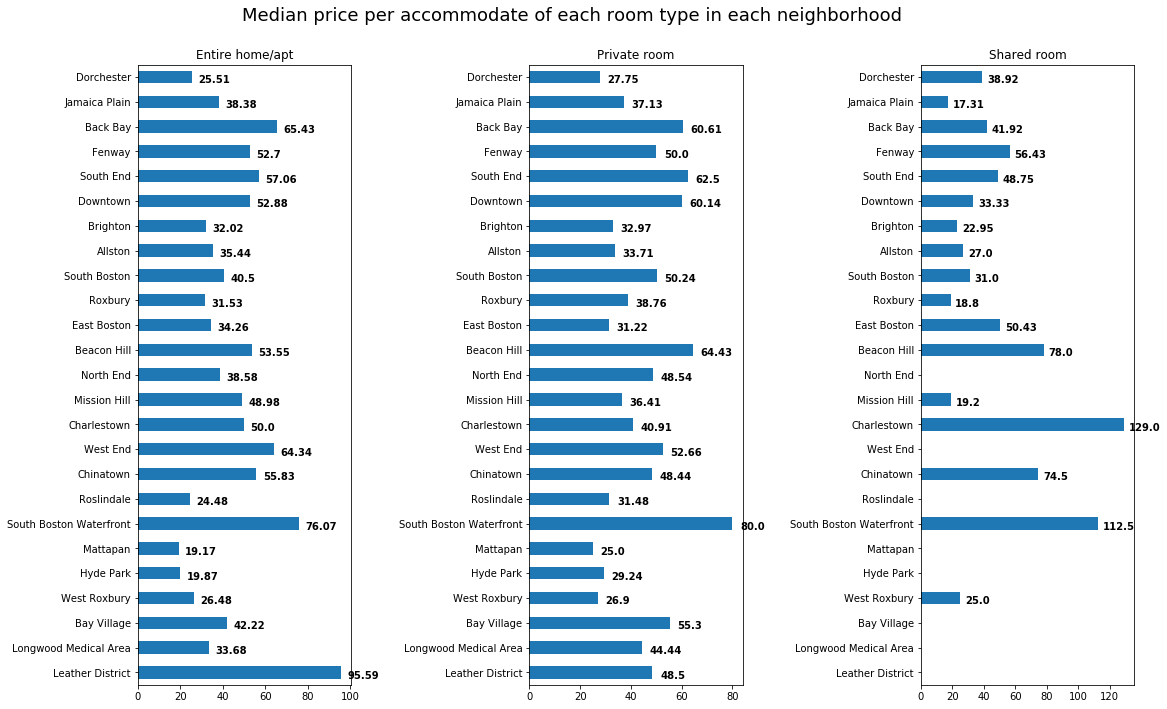

In [366]:
plot_medianprice_per_counts(df_price_per_accommodates, 
                            title='Median price per accommodate of each room type in each neighborhood');

Next, let's find out how much in average one bedroom cost in each neighborhood

In [364]:
# Find descriptive statistics of a median listing price divide by 
# an average number of bedrooms

df_price_per_bedrooms = df_price_roomtype.div(df_neighbourhood_bedrooms, axis='index')
df_price_per_bedrooms.describe()

room_type,Entire home/apt,Private room,Shared room
count,25.000000,25.000000,17.000000
mean,120.412382,89.133853,81.117647
std,51.323088,36.197261,55.701360
min,45.454545,50.000000,24.000000
25%,84.391534,58.910891,50.000000
50%,107.344633,74.311927,65.000000
75%,156.306306,110.091743,79.000000
max,232.142857,181.720430,225.000000


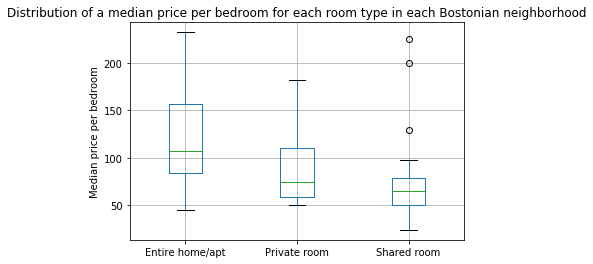

In [367]:
# Next, inspect the boxplot
ax = df_price_per_bedrooms.boxplot();
ax.set(xlabel='', ylabel='Median price per bedroom');
ax.set_title('Distribution of a median price per bedroom for each room type in each Bostonian neighborhood');


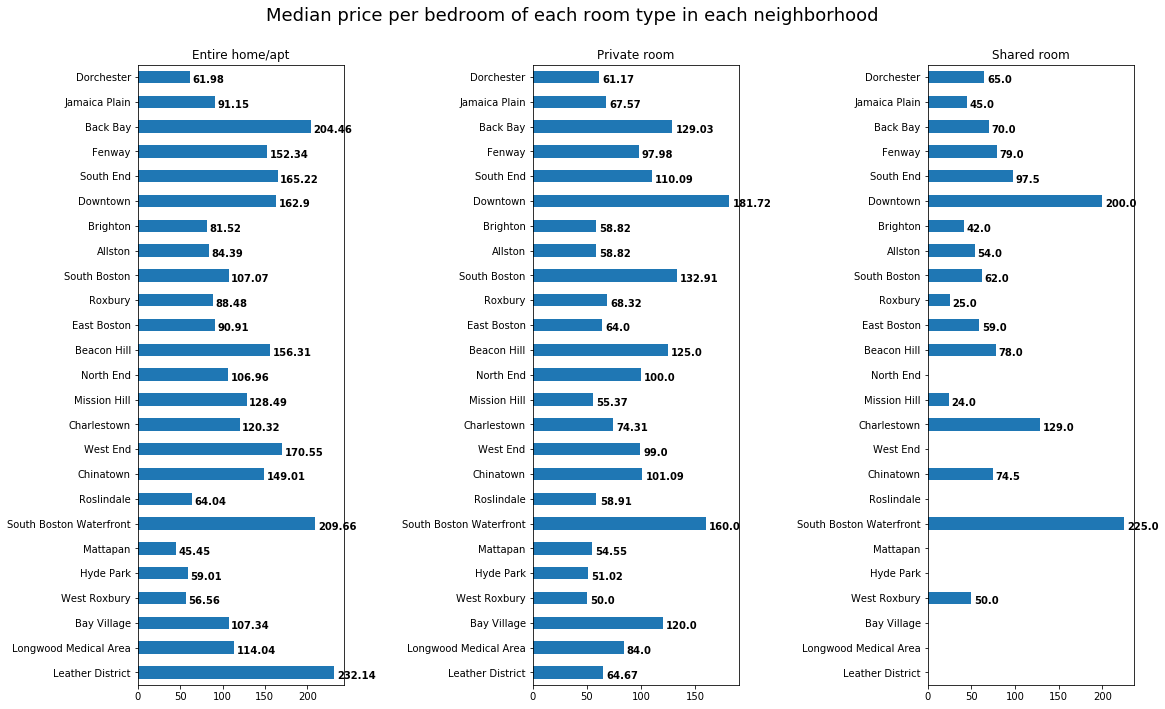

In [368]:
plot_medianprice_per_counts(df_price_per_bedrooms, 
                            title='Median price per bedroom of each room type in each neighborhood');

Finally, let's find a distance from each neighborhood to boston:

In [422]:
# The coordinate data is retrived from google
coords_boston = (42.3601, 71.0589)
coords_neighborhoods = {
    'Dorchester': (42.3016, 71.0676),
    'Jamaica Plain': (42.3097, 71.1151),
    'Back Bay': (42.3503, 71.0810),
    'Fenway': (42.3429, 71.1003),
    'South End': (42.3388, 71.0765),
    'Downtown': (42.3601, 71.0589),
    'Brighton': (42.3464, 71.1627),
    'Allston': (42.3539, 71.1337),
    'South Boston': (42.3381, 71.0476),
    'Roxbury': (42.3152, 71.0914),
    'East Boston': (42.3702, 71.0389),
    'Beacon Hill': (42.3588, 71.0707),
    'North End': (42.3647, 71.0542),
    'Mission Hill': (42.3296, 71.1062),
    'Charlestown': (42.3782, 71.0602),
    'West End': (42.3644, 71.0661),
    'Chinatown': (42.3501, 71.0624),
    'Roslindale': (42.2832, 71.1270),
    'South Boston Waterfront': (42.3483, 71.0428),
    'Mattapan': (42.2771, 71.0914),
    'Hyde Park': (42.2565, 71.1241),
    'West Roxbury': (42.2798, 71.1627),
    'Bay Village': (42.3490, 71.0698),
    'Longwood Medical Area': (42.3360, 71.0997),
    'Leather District': (42.3505, 71.0579)
}

In [423]:
# Create a new dataframe which contains 
# 1. Median price per accommodate
# 2. Distance to boston (miles)

dict_distance_to_boston = {}
for cur_neighborhood, cur_coords in coords_neighborhoods.items():
    dict_distance_to_boston[cur_neighborhood] = geopy.distance.distance(coords_boston, cur_coords).miles
    
df_distance = pd.DataFrame.from_dict(dict_distance_to_boston, orient='index', columns=['distance_to_boston_miles'])
df_combined_accom_distance = df_price_per_accommodates.copy()
df_combined_accom_distance.loc[:, 'distance_to_boston_miles'] = df_distance['distance_to_boston_miles']



In [424]:
df_combined_accom_distance

room_type,Entire home/apt,Private room,Shared room,distance_to_boston_miles
neighbourhood_cleansed,,,,
Dorchester,25.510204,27.753304,38.922156,4.062280
Jamaica Plain,38.377193,37.128713,17.307692,4.514899
Back Bay,65.428571,60.606061,41.916168,1.318167
Fenway,52.702703,50.000000,56.428571,2.429377
South End,57.057057,62.500000,48.750000,1.724344
Downtown,52.879581,60.142349,33.333333,0.000000
Brighton,32.023810,32.967033,22.950820,5.397554
Allston,35.444444,33.707865,27.000000,3.853024
South Boston,40.495050,50.239234,31.000000,1.624963


Lastly, find descriptive statistics for this dataframe

In [425]:
df_combined_distance.describe()

room_type,Entire home/apt,Private room,Shared room,distance_to_boston_miles
count,25.000000,25.000000,17.000000,25.000000
mean,120.412382,89.133853,81.117647,2.786698
std,51.323088,36.197261,55.701360,2.363188
min,45.454545,50.000000,24.000000,0.000000
25%,84.391534,58.910891,50.000000,0.947819
50%,107.344633,74.311927,65.000000,1.724344
75%,156.306306,110.091743,79.000000,4.062280
max,232.142857,181.720430,225.000000,7.892345


### Summary:

The top two neighborhoods that have the most number of listings are Dorchester and Jamaica Plain are in suburb areas and, in average, a median price per accomodate and bedroom are much lower than other neighborhoods in Boston for all room types but they are a little further away from Boston but are still in the 5-mile radius.

Since they are not too far away from the city and the median price is relatively lower than other neighborhoods, that is probably why those neighborhoods are more popular than others.

## Question 3

### When should I start booking?

The file 'calendar.csv' contains a data set about pricing and availability of each listing for the next calendar year starting from the date where data is compiled (November 2018 to November 2019).

Since an Airbnb host can setup a calendar for their listing so that it is only available for a few days or weeks a year, let's find out how many listings are available in the next calendar year

In [426]:
# First, let's find a total number of listings in Bostong
len(df_calendar['listing_id'].unique())

6296

In [427]:
# Inspect the dataframe
df_calendar.head()

,listing_id,date,available,price
0,414419,2019-11-16,t,150.0
1,22208,2019-11-16,t,225.0
2,22208,2019-11-15,t,225.0
3,22208,2019-11-14,t,225.0
4,22208,2019-11-13,t,225.0


In [429]:
# Let's create a new column 'date_month' which store a month information
df_calendar['date_month'] = df_calendar['date'].dt.to_period("M")

# Then, find a number of unique available listings in each month
calendar_num_available = df_calendar[df_calendar['available'] == 't'] \
                            .groupby(['date_month']) \
                                ['listing_id'] \
                                .nunique()

Let's see how many available listings are available in the coming year

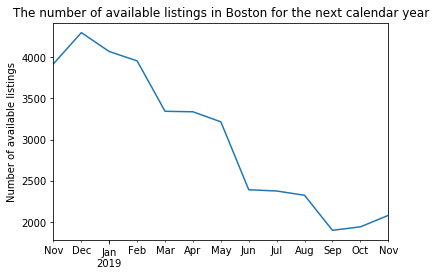

In [432]:
ax = calendar_num_available.plot();
ax.set(xlabel='', ylabel='Number of available listings');
ax.set_title('The number of available listings in Boston for the next calendar year');

Interestingly, we will see a lot of listings in the next few months and the number will keep decreasing as a number of date increased. 

Is this true for all neighborhoods? Let's find out!

In [435]:
# Get a list of date month object first
list_date_month = calendar_num_available.index.tolist()

# Then, parse them to string and we will use them to create a new data frame
str_list_date_month = [x.strftime('%Y-%m') for x in list_date_month]


In [436]:
# Get a number of available listings in each neighborhood in the next calendar year
dict_unique_listing_date_month =dict(zip(str_list_date_month, [[] for x in range(len(str_list_date_month))]))
dict_neighborhood_date_month =dict(zip(neighbourhoods, [[] for x in range(len(neighbourhoods))]))

for cur_month in list_date_month:
    
    str_cur_month = cur_month.strftime('%Y-%m')
    print('* Collecting data for ' + str_cur_month)
    
    # Get unique listing for the current month
    df_calendar_cur_month = df_calendar[df_calendar['date_month'] == cur_month]
    unique_listing = df_calendar_cur_month[df_calendar_cur_month['available'] == 't']['listing_id'].unique().tolist()
    
    dict_unique_listing_date_month[str_cur_month] = unique_listing
    
    # Then, get listing data of the current month
    df_listing_cur_month = df_listing[df_listing['id'].isin(unique_listing)]
    
    # Find a number of listing in each neighbourhood
    cur_listing_neighbourhood = df_listing_cur_month.groupby('neighbourhood_cleansed').size()
    for index, value in cur_listing_neighbourhood.iteritems():
        dict_neighborhood_date_month[index].append(value)


* Collecting data for 2018-11
* Collecting data for 2018-12
* Collecting data for 2019-01
* Collecting data for 2019-02
* Collecting data for 2019-03
* Collecting data for 2019-04
* Collecting data for 2019-05
* Collecting data for 2019-06
* Collecting data for 2019-07
* Collecting data for 2019-08
* Collecting data for 2019-09
* Collecting data for 2019-10
* Collecting data for 2019-11


In [438]:
# Create a new dataframe from the newly created dictionary
df_listing_by_month = pd.DataFrame.from_dict(dict_neighborhood_date_month, 
                                             orient='index', 
                                             columns=str_list_date_month)

# drop neighborhoods with all na
df_listing_by_month = df_listing_by_month.dropna(axis='index', how='all')

In [441]:
# Inspect the data
df_listing_by_month

,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
Allston,162.0,183.0,161.0,156.0,127.0,118.0,121.0,87.0,85.0,83.0,71.0,71.0,89.0
Back Bay,331.0,333.0,324.0,314.0,291.0,283.0,245.0,205.0,199.0,188.0,131.0,124.0,134.0
Bay Village,17.0,18.0,18.0,17.0,15.0,14.0,11.0,7.0,7.0,7.0,5.0,4.0,3.0
Beacon Hill,160.0,171.0,148.0,139.0,117.0,114.0,103.0,86.0,85.0,84.0,54.0,55.0,55.0
Brighton,224.0,272.0,231.0,223.0,170.0,170.0,174.0,121.0,119.0,120.0,109.0,108.0,120.0
Charlestown,88.0,95.0,90.0,85.0,72.0,81.0,75.0,55.0,56.0,56.0,52.0,51.0,49.0
Chinatown,92.0,103.0,104.0,100.0,91.0,87.0,85.0,61.0,63.0,61.0,52.0,54.0,60.0
Dorchester,382.0,426.0,422.0,431.0,384.0,389.0,386.0,315.0,313.0,310.0,292.0,285.0,276.0
Downtown,299.0,312.0,296.0,292.0,263.0,252.0,233.0,126.0,127.0,123.0,87.0,93.0,139.0
East Boston,219.0,214.0,184.0,182.0,117.0,121.0,120.0,66.0,64.0,64.0,57.0,56.0,50.0


Let's create a plot to see a trend of a number of available listings of each neighborhood

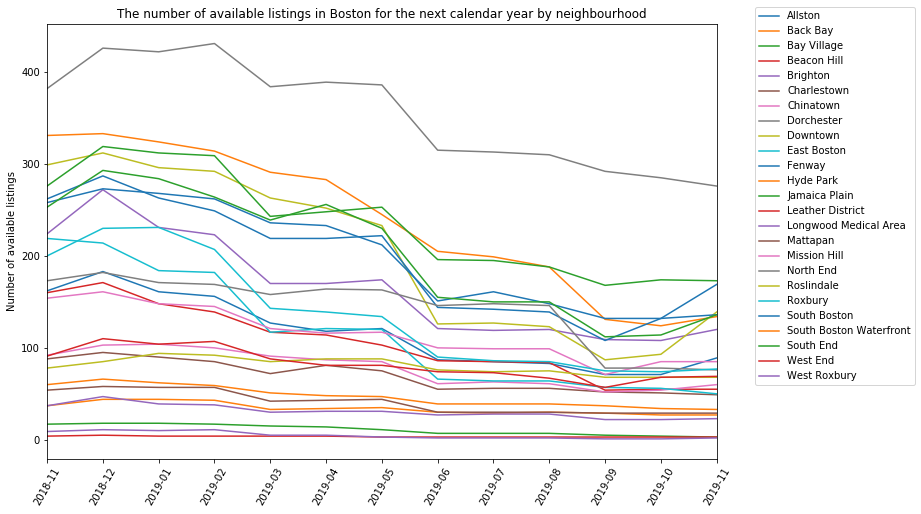

In [445]:
# Transpose data before creating a line plot since we use time in the x-axis
ax = df_listing_by_month.T.plot(figsize=(12,8));
ax.set(xlabel='', ylabel='Number of available listings');
ax.set_title('The number of available listings in Boston for the next calendar year by neighbourhood');

# Use a month string as an x-axis label
plt.xticks(
    np.arange(len(df_listing_by_month.columns.values)), 
    df_listing_by_month.columns.values, 
    rotation=60);


# Move the legend box so it won't hide the chart
ax.legend(bbox_to_anchor=(1.05, 1.05));


The chart above shows that a number of listings are decreased overall as a number of days increased except for South Boston (Blue) and Downtown (yellowish green) where a number of available listings are decreased until September 2019 and start to increase again.

Lastly, let's take a look at a percentage of available listings in each neighborhood for the next calendar year.

In [463]:
# Divide a number of available listings with a number of total listings
df_listing_by_month_percentage = df_listing_by_month.div(df_num_roomtype['total_listings'], axis='index')*100

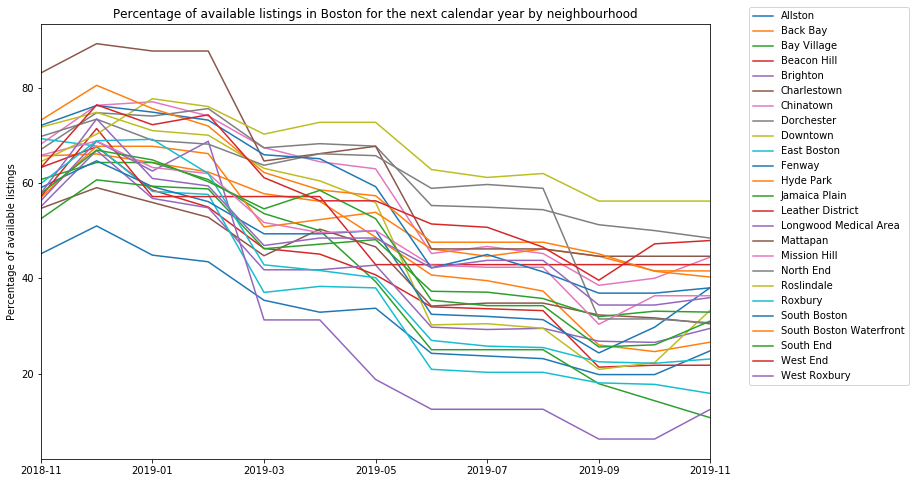

In [465]:
# Then, let's take a look at the trend chart

ax = df_listing_by_month_percentage.T.plot(figsize=(12,8));

ax.set(xlabel='', ylabel='Percentage of available listings');
ax.set_title('Percentage of available listings in Boston for the next calendar year by neighbourhood');

# Move the legend box so it won't hide the chart
ax.legend(bbox_to_anchor=(1.05, 1.05));

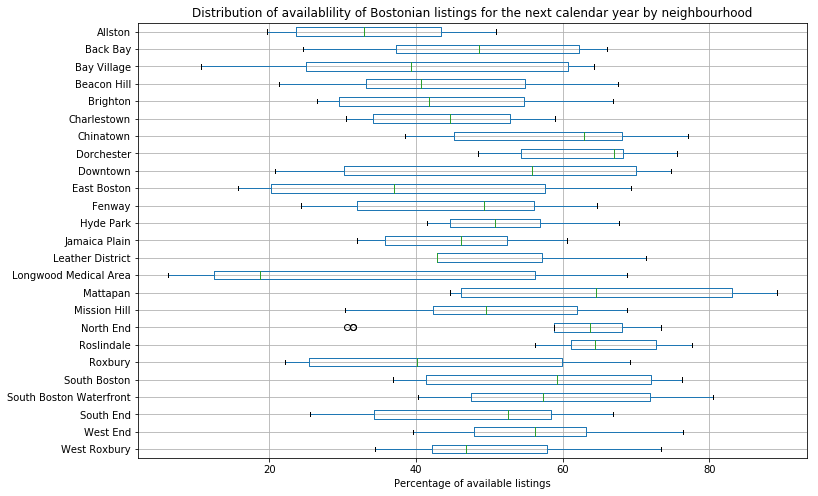

In [469]:
# And also look at the boxplot

ax = df_listing_by_month_percentage.T.boxplot(vert=False, figsize=(12,8))
ax.invert_yaxis()

ax.set(xlabel='Percentage of available listings', ylabel='');
ax.set_title('Distribution of availablility of Bostonian listings for the next calendar year by neighbourhood');


In [474]:
# See descriptive statististics of availability
with pd.option_context('display.max_rows', 10, 'display.max_columns', 50):
    print(df_listing_by_month_percentage.T.describe())

         Allston   Back Bay  Bay Village  Beacon Hill   Brighton  Charlestown  \
count  13.000000  13.000000    13.000000    13.000000  13.000000    13.000000   
mean   32.440540  47.344322    39.285714    41.684403  40.842941    43.239369   
std    10.802399  15.800001    20.412415    15.898646  13.688890    10.554555   
min    19.777159  24.603175    10.714286    21.343874  26.535627    30.434783   
25%    23.676880  37.301587    25.000000    33.201581  29.484029    34.161491   
50%    32.869081  48.611111    39.285714    40.711462  41.769042    44.720497   
75%    43.454039  62.301587    60.714286    54.940711  54.791155    52.795031   
max    50.974930  66.071429    64.285714    67.588933  66.830467    59.006211   

       Chinatown  Dorchester   Downtown  East Boston     Fenway  Hyde Park  \
count  13.000000   13.000000  13.000000    13.000000  13.000000  13.000000   
mean   57.720798   62.226721  48.736395    36.854917  44.265419  52.307692   
std    14.595480   10.064271  21.034

In [477]:
df_listing_by_month_percentage.T.mean().sort_values(ascending=False)

Roslindale                 66.052130
Mattapan                   62.958580
Dorchester                 62.226721
Chinatown                  57.720798
South Boston Waterfront    57.598499
North End                  57.444169
West End                   57.158120
South Boston               55.908896
Hyde Park                  52.307692
Leather District           50.549451
Mission Hill               49.342538
Downtown                   48.736395
West Roxbury               48.437500
Back Bay                   47.344322
South End                  46.294345
Jamaica Plain              44.662182
Fenway                     44.265419
Charlestown                43.239369
Beacon Hill                41.684403
Brighton                   40.842941
Roxbury                    40.787655
Bay Village                39.285714
East Boston                36.854917
Allston                    32.440540
Longwood Medical Area      30.769231
dtype: float64

The results above show that Roslindale, Mattapan, and Dorchester which are in a suburb area have a top availability rate in the next calendar year where most neighbourhood have less than 50% availability in the next calendar year

### Summary


The availability of listings are highest when it is 1-3 months before the booking time and a rate of availabilty keeps decreasing as time increased and the suburb areas like Roslindale, Mattapan, and Dorchester have a high availability rate for the next calendar year.